#### Moises Quiroz Diaz
##### G3 data science

## Desafío - Regresión desde la econometría

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Contexto

En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud
financiera. La base contenida en el csv Credit contiene las siguientes variables:

* Income : Ingreso anual disponible en miles de dólares.
* Limit : Límite del crédito.
* Rating : Ranking del crédito.
* Cards : Cantidad de tarjetas de credito.
* Age : Edad del usuario.
* Education : Años de educación del usuario.
* Gender : ¿Hombre o mujer?
* Student : ¿Es estudiante?
* Married : ¿Está casado?
* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* Balance : Promedio de deuda en tarjeta de crédito de usuario.

Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el
promedio de deuda en tarjeta de crédito.

A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de
distintos atributos


### Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para AfricanAmerican y Asian.
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv('Credit.csv')
data = data.drop("Unnamed: 0", axis=1)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
tmp = data
tmp =pd.get_dummies(tmp, columns=["Gender","Student","Married"])
tmp.head()

,Income,Limit,Rating,Cards,Age,Education,Ethnicity,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes
0,14.891,3606,283,2,34,11,Caucasian,333,1,0,1,0,0,1
1,106.025,6645,483,3,82,15,Asian,903,0,1,0,1,0,1
2,104.593,7075,514,4,71,11,Asian,580,1,0,1,0,1,0
3,148.924,9504,681,3,36,11,Asian,964,0,1,1,0,1,0
4,55.882,4897,357,2,68,16,Caucasian,331,1,0,1,0,0,1


In [4]:
tmp =pd.get_dummies(tmp, columns=["Ethnicity"])
tmp = tmp.rename(index=str, columns={"Gender_ Male": "Gender_Male","Ethnicity_African American":"Ethnicity_African_American"})
tmp = tmp.drop(["Ethnicity_Caucasian","Student_No","Married_No","Gender_Female"], axis=1)
tmp.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African_American,Ethnicity_Asian
0,14.891,3606,283,2,34,11,333,1,0,1,0,0
1,106.025,6645,483,3,82,15,903,0,1,1,0,1
2,104.593,7075,514,4,71,11,580,1,0,0,0,1
3,148.924,9504,681,3,36,11,964,0,0,0,0,1
4,55.882,4897,357,2,68,16,331,1,0,1,0,0


### Desafío 2: Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [5]:
def plot_hist(df,variable):
    plt.hist(df[variable],bins = 25)
    plt.axvline(np.mean(df[variable]),label='Media de la variable: '+ str(np.mean(df[variable])),color='blue')
    plt.axvline(np.median(df[variable]),label='Mediana de la variable: '+ str(np.median(df[variable])),color='r')
    plt.legend()
    plt.show()

---------------------------------------------

Histograma de: Balance


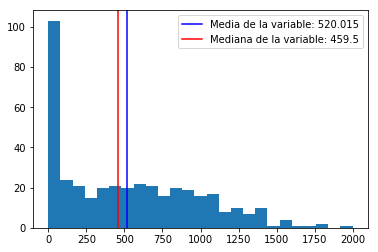

---------------------------------------------

Histograma de: Income


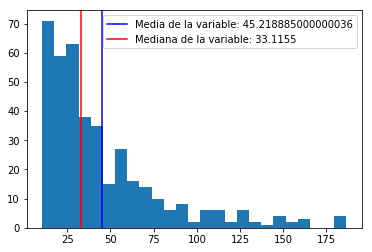

---------------------------------------------

Histograma de: Cards


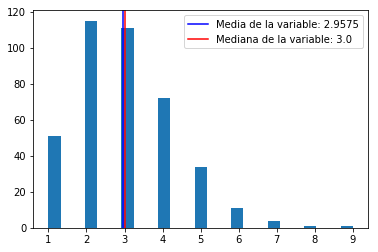

---------------------------------------------

Histograma de: Rating


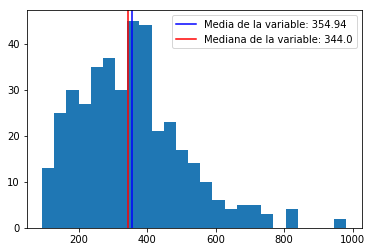

In [6]:
variables = ['Balance','Income','Cards','Rating']
for i in variables:
    print('---------------------------------------------')
    print('\nHistograma de:',i)
    plot_hist(tmp,i)

### Desafío 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:


* Utilizando statsmodels , comente brevemente los siguientes puntos:
    * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
    * ¿Qué podemos decir sobre el comportamiento de Student ?
        * ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?



In [7]:
Stu_yes =smf.ols('Balance ~ Student_Yes',tmp).fit()

In [8]:
Stu_yes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        11:46:57   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
income =smf.ols('Balance ~ Income',tmp).fit()
income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        11:46:57   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
rating =smf.ols('Balance ~ Rating',tmp).fit()
rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 01 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        11:46:57   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?

Es Rating con un R-squared de 0.746

* ¿Qué podemos decir sobre el comportamiento de Student ?


Su informacion tiene poco peso en la variabilidad del balance
* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [11]:
t,pval = stats.ttest_ind(tmp[tmp.Student_Yes==1].Balance.dropna(),tmp[tmp.Student_Yes==0].Balance.dropna())
print('El valor t:',t)
print('El valor p_val:',pval)

El valor t: 5.349964123075003
El valor p_val: 1.4877341077323024e-07


Se rechaza la hipotesis nula de que ambas medias son iguales

### Desafío 4: Genere un modelo que incluya todos los regresores

* Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.


In [12]:
tmp.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Gender_Male', 'Student_Yes', 'Married_Yes',
       'Ethnicity_African_American', 'Ethnicity_Asian'],
      dtype='object')

In [13]:
modelo_all =smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender_Male + Student_Yes + Married_Yes + Ethnicity_African_American + Ethnicity_Asian',tmp).fit()
modelo_all.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Mon, 01 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        11:46:57   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income                        -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                          0.1909      0.033      5.824      0.000       0.126       0.255
Rating                         1.1365      0.491      2.315      0.021       0.171       2.102
Cards                         17.7245      4.341      4.083      0.000       9.190      26.259
Age                           -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                     -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_Male                   10.6532      9.914      1.075      0.283      -8.839      30.145
Student_Yes                  425.7474     16.723     25.459      0.000     392.869     458.626
Married_Yes                   -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_African_American   -10.1070     12.210     -0.828      0.408     -34.113      13.899
Ethnicity_Asian                6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------
* Es probable que debido a que se utilizan todas las variables el modelo este sobre-ajustado, se observa un R-square muy alto. Las variables que se observan son las mas significativas son Income, Limit, Cards, Student_yes

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value <= 0.025. Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?


In [14]:
modelo_update =smf.ols('Balance ~ Income + Limit + Cards + Student_Yes+ Rating',tmp).fit()
modelo_update.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Mon, 01 Jul 2019   Prob (F-statistic):          3.60e-261
Time:                        11:46:57   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income         -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit           0.1944      0.033      5.977      0.000       0.130       0.258
Cards          17.8517      4.335      4.118      0.000       9.329      26.374
Student_Yes   426.8501     16.574     25.754      0.000     394.266     459.435
Rating          1.0879      0.487      2.234      0.026       0.130       2.045
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------------
* Se observa un modelo que explica mejor a Balance, R-square subio y F disminuyo lo que se podira considerar como un mejor modelo, ya que solo se utilizaron variables que tenian una significancia importante para el modelo

### Desafío 6:

* Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

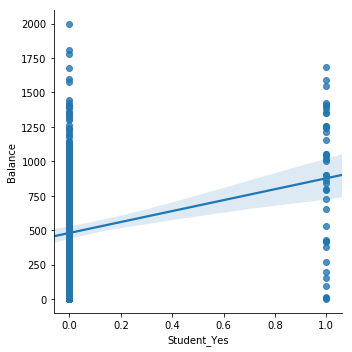

In [15]:
g = sns.lmplot(x="Student_Yes", y="Balance", data=tmp)

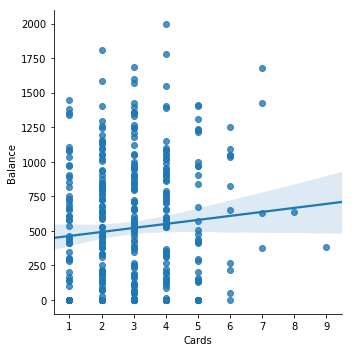

In [16]:
g = sns.lmplot(x="Cards", y="Balance", data=tmp)


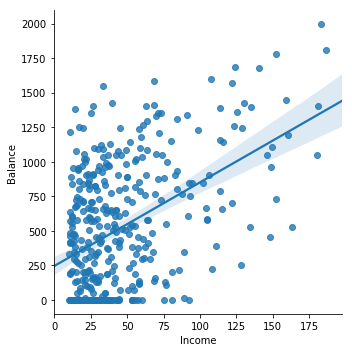

In [17]:
g = sns.lmplot(x="Income", y="Balance", data=tmp)